# S&P500 vs VIX

In [45]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = yf.download("^GSPC ^VIX", start="2000-01-01", interval="1d")["Close"]
data.dropna(inplace=True)

[*********************100%***********************]  2 of 2 completed


### The VIX Index
The CBOE publishes indices of implied volatility. The most popular index, the SPX VIX, is an index of the implied volatility of 30-day options on the S&P 500 calculated from a wide range of calls and puts.10 It is sometimes referred to as the ‘‘fear factor.’’ An index value of 15 indicates that the implied volatility of 30-day options on the S&P 500 is estimated as 15%. Information on the way the index is calculated is in Section 26.15. Trading in futures on the VIX started in 2004 and trading in options on the VIX started in 2006. One contract is on 1,000 times the index.
A trade involving futures or options on the S&P 500 is a bet on both the future level of the S&P 500 and the volatility of the S&P 500. By contrast, a futures or options contract on the VIX is a bet only on volatility. Figure 15.4 shows the VIX index between January 2004 and June 2013. Between 2004 and mid-2007 it tended to stay between 10 and 20. It reached 30 during the second half of 2007 and a record 80 in October and November 2008 after Lehman’s bankruptcy. By early 2010, it had declined to a more normal levels, but it spiked again in May 2010 and the second half of 2011 because of stresses and uncertainties in financial markets.


###### Hull J.C.-Options, Futures and Other Derivatives9th edition

In [47]:
data.head(10)

,^GSPC,^VIX
Date,,
2000-01-03,1455.219971,24.209999
2000-01-04,1399.420044,27.010000
2000-01-05,1402.109985,26.410000
2000-01-06,1403.449951,25.730000
2000-01-07,1441.469971,21.719999
2000-01-10,1457.599976,21.709999
2000-01-11,1438.560059,22.500000
2000-01-12,1432.250000,22.840000
2000-01-13,1449.680054,21.709999


In [48]:
data.describe()

,^GSPC,^VIX
count,5882.000000,5882.000000
mean,1908.829741,20.179279
std,996.076172,8.632699
min,676.530029,9.140000
25%,1186.879974,14.002500
50%,1441.474976,18.260000
75%,2437.697449,23.867501
max,4796.560059,82.690002


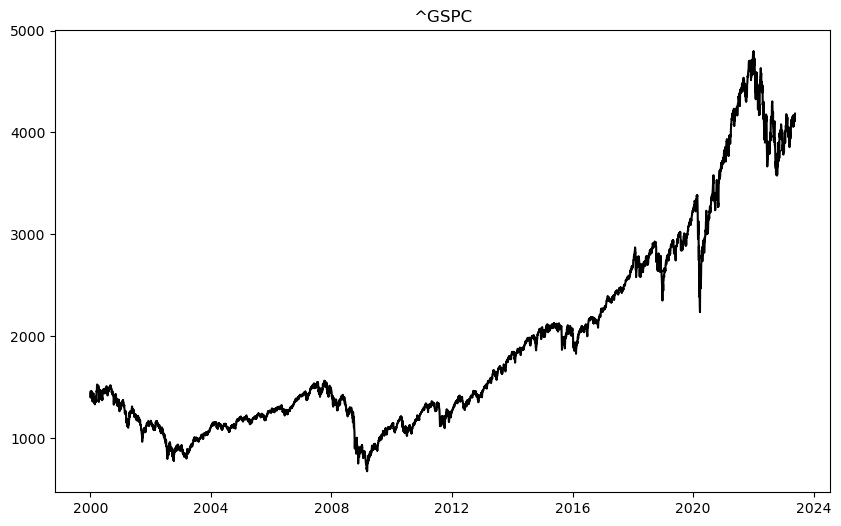

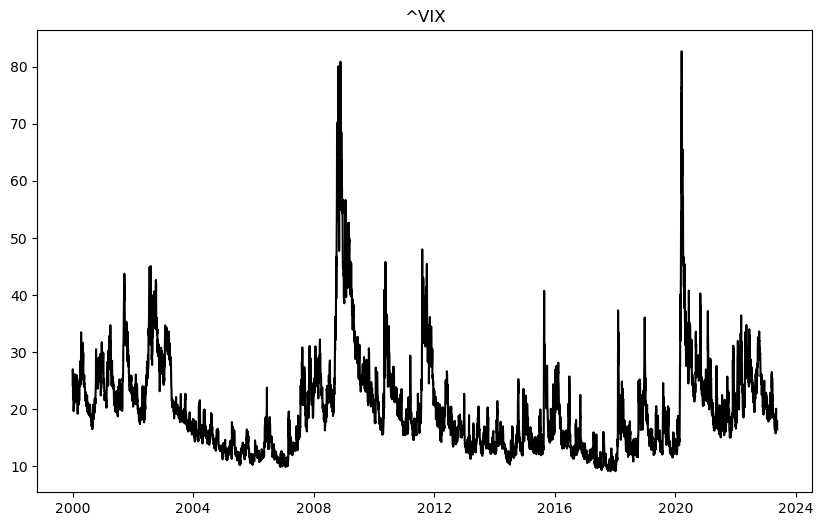

In [59]:
for single_data in data:
    plt.figure(figsize=(10,6), dpi=100)
    plt.plot(data[single_data], color="black")
    plt.title(single_data)
    plt.show()
    

In [50]:
log_returns = np.log(data/data.shift(1))
log_returns

,^GSPC,^VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424
...,...,...
2023-05-12,-0.001585,0.005889
2023-05-15,0.002954,0.005271
2023-05-16,-0.006398,0.049569


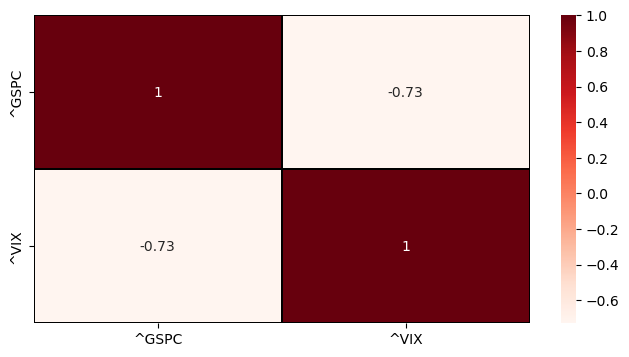

In [51]:
plt.figure(figsize=(8,4), dpi=100)
sns.heatmap(log_returns.corr(), cmap="Reds", linecolor="black", linewidth=0.1, annot=True);

In [52]:
x = log_returns["^VIX"]
y = log_returns["^GSPC"]
x.dropna(inplace=True)
y.dropna(inplace=True)

In [53]:
x,y.head(10)

(Date
 2000-01-04    0.109441
 2000-01-05   -0.022464
 2000-01-06   -0.026085
 2000-01-07   -0.169424
 2000-01-10   -0.000461
                 ...   
 2023-05-12    0.005889
 2023-05-15    0.005271
 2023-05-16    0.049569
 2023-05-17   -0.064279
 2023-05-18   -0.024604
 Name: ^VIX, Length: 5881, dtype: float64,
 Date
 2000-01-04   -0.039099
 2000-01-05    0.001920
 2000-01-06    0.000955
 2000-01-07    0.026730
 2000-01-10    0.011128
 2000-01-11   -0.013149
 2000-01-12   -0.004396
 2000-01-13    0.012096
 2000-01-14    0.010615
 2000-01-18   -0.006856
 Name: ^GSPC, dtype: float64)

In [54]:
fitParameters = b, a = np.polyfit(x, y, 1)

In [55]:
b

-0.1286196086623736

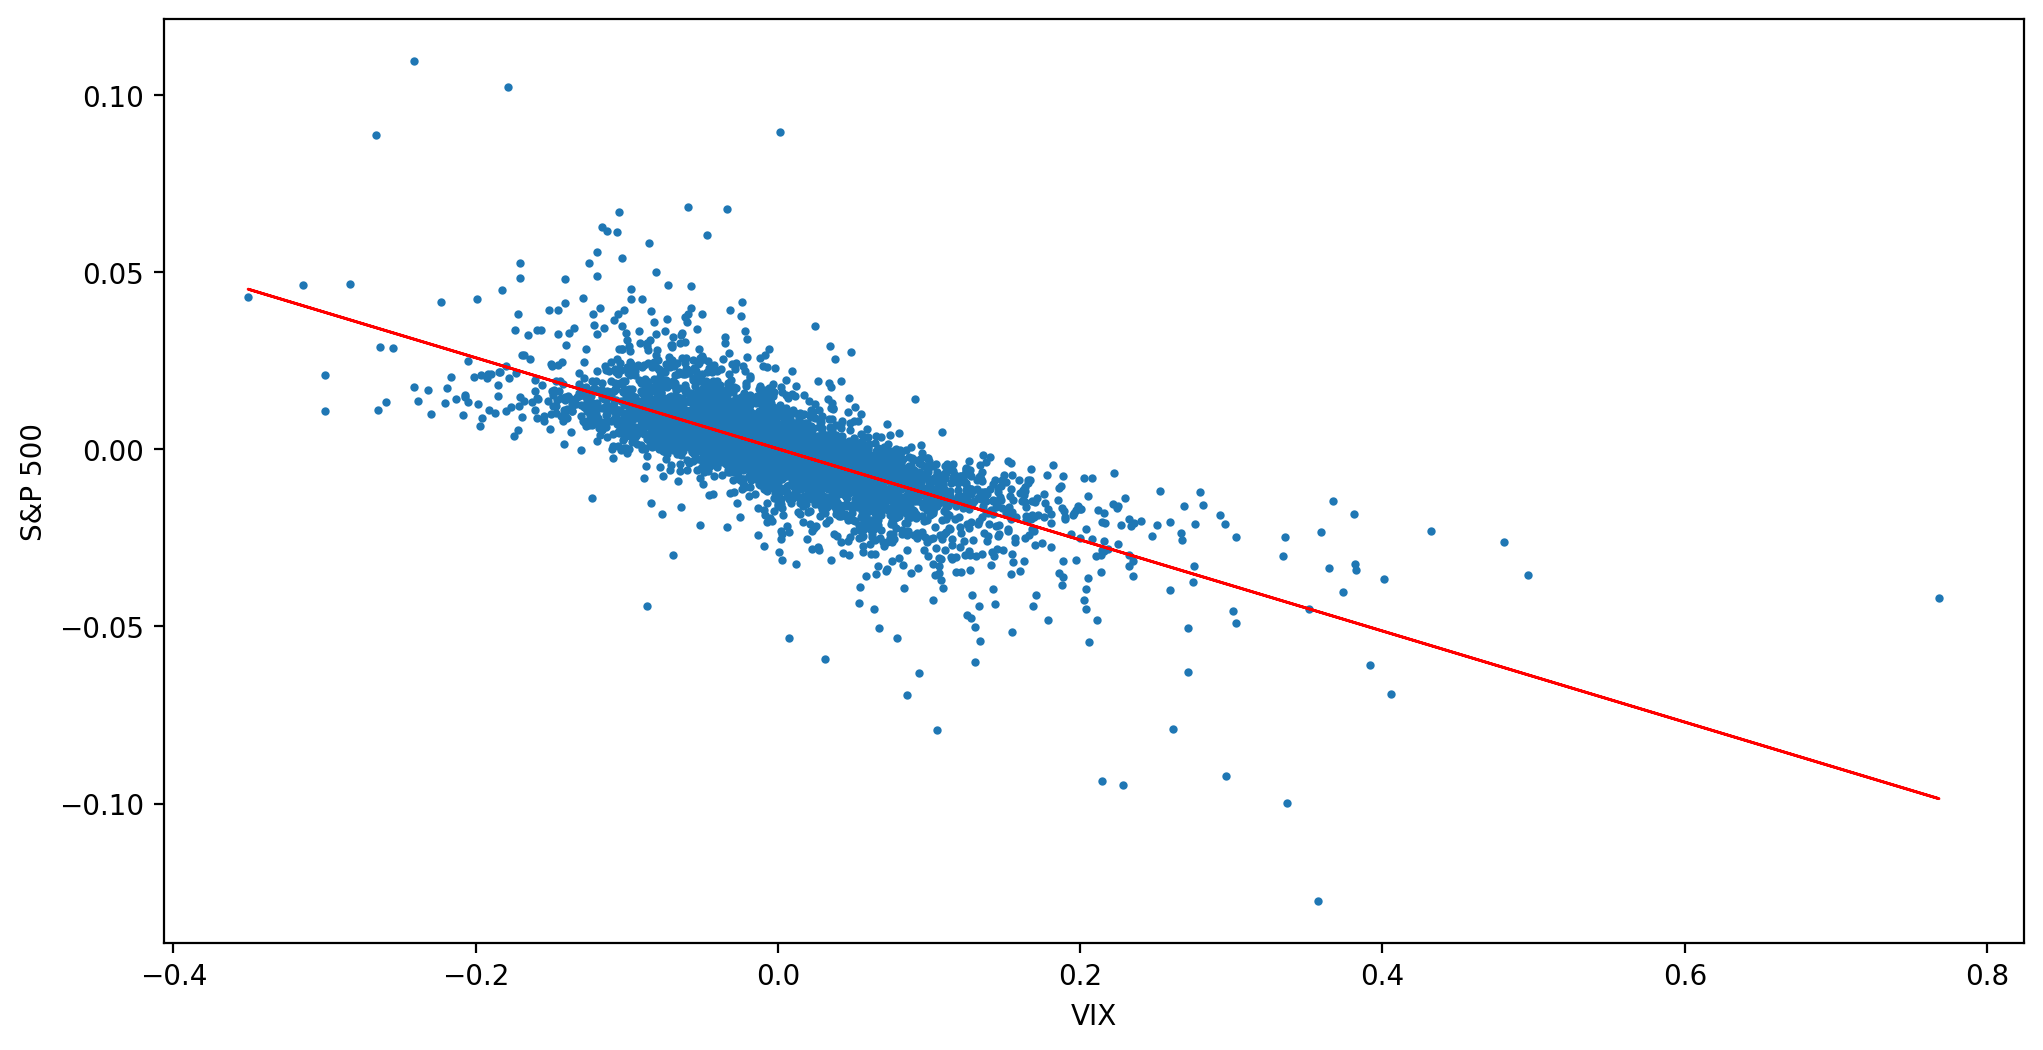

In [56]:
fig, ax = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax.plot(x,y, ".", markersize=4)
ax.plot(x, b*x+a, color='red', linewidth=1)
ax.set_xlabel("VIX")
ax.set_ylabel("S&P 500")
plt.show()

In [57]:
# Rsquared  reg dev / total dev
p = np.poly1d(fitParameters)
yi = p(x)
ym = np.sum(y)/len(y)
devreg = np.sum((yi-ym)**2)
devtot = np.sum((y - ym)**2)
Rsquared = devreg / devtot

In [58]:
Rsquared

0.5315938480967841